<a href="https://colab.research.google.com/github/Gitprincesskerry/IS362/blob/main/Car_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center><b>Car Data Analysis</center></b>**
===========================================

<u>Tasks:</u>

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables.
Here is a link to the “Auto MPG” dataset in the UC Irvine data repository: https://archive.ics.uci.edu/ml/datasets/Auto+MPG.
    
1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a
   pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about
   the distribution of one of the variables, or the relationship between two (or more!) of the variables in the
   “Auto MPG” dataset.

**<center><b>To analyze the questions above we must import the pandas, numpy, seaborn, and matplotlotlib libraries. <br> The following code will import these libraries.<center><b>**

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

**<center><b>Next, the code below will import the data file "auto-mpg.data" using pandas.<br> This particular data set has whitespace before the data, <br> thus we must add delim_whitespace=True in this instance to remove it.<center><b>**

In [12]:
car_info = pd.read_csv('https://raw.githubusercontent.com/Gitprincesskerry/IS362/main/Car_Analysis/auto-mpg.data', delim_whitespace=True)
car_info

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


**<center>Next, we will use the code below to read the information from the "auto-mpg.names" file, <br> which depicts the attribute information for the dataset we are working with.</center>**

In [24]:
from urllib.request import urlopen
url = "https://raw.githubusercontent.com/Gitprincesskerry/IS362/main/Car_Analysis/auto-mpg.names"
page = urlopen(url)
create_byte = page.read()
create = create_byte.decode("utf-8")
print(create)

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

**<center>Next, let's rename the columns of the dataset we're working with and generate the outcome by utilizing the following code:</center>**


In [25]:
car_info_titlenames = ['Mpg','Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
car_info.columns = car_info_titlenames
car_info

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


**<center>We will continue by selecting all rows in the horsepower column which has the character "?" and subsquently replace it with null values "Nan".</center>**

In [27]:
car_info.loc[car_info['Horsepower']=='?']

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
31,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
125,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
329,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
373,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [35]:
car_info = car_info.replace('?', np.nan)

# Code to double check if the '?' are still in the dateset
car_info.loc[car_info['Horsepower']=='?']

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name


In [40]:
# Code to double check if the '?' has been changed to null values
car_info.loc[car_info.Horsepower.isnull()]

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
31,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
125,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
329,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
373,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


**<center>Next, we will change the Horsepower column to a numeric column:</center>**

In [41]:
# Let's see the datatype of the all columns in the dataset:
car_info.dtypes

Mpg             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Car Name         object
dtype: object

In [43]:
# We can view the datatype for the Horsepower column without viewing the other columns by using the following code:
#It will return dtype('O'), which is another way to say object
car_info['Horsepower'].dtypes

dtype('O')

In [45]:
#Now let's convert the Horsepower column to a numeric column:
car_info['Horsepower'] = pd.to_numeric(car_info['Horsepower'])

#Let's double check if the datatype changed:
car_info['Horsepower'].dtypes

dtype('float64')

**<center>Let's proceed by changing the values in the origin columns from 1, 2, and 3 to USA, Asia, and Europe.<br> We will generate the output to confirm the numerical values changed to the new values:</center>**

In [46]:
car_info = car_info.replace({'Origin': {1:"USA", 2: "Asia", 3: "Europe"}})
car_info

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,USA,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
393,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
394,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
395,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger


**<center>Let's create a bar chart that depicts the distribution for cylinders:</center>**

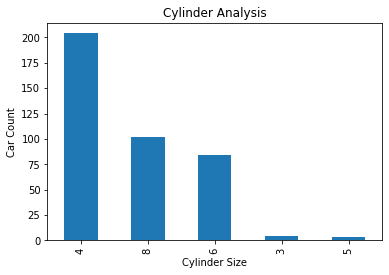

In [77]:
cylinder_query_for_bar_graph = car_info['Cylinders'].value_counts().plot(kind='bar', title='Cylinder Analysis', xlabel='Cylinder Size', ylabel='Car Count')

**<center>Now we will create a scatterplot that depicts the relationship between horsepower and weight:</center>**

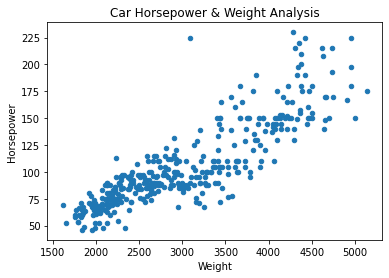

In [84]:
car_info_scatter = car_info.plot.scatter(x='Weight',y='Horsepower', title='Car Horsepower & Weight Analysis')

**<center> Lastly, let's use matplotlib and seaborn graphics capabilities to analyze the weight and horsepower in each country in the dataset:</center>**

<u>USA Horsepower vs. Weight Analysis:</u>

(1500.0, 5500.0, 0.0, 250.0)

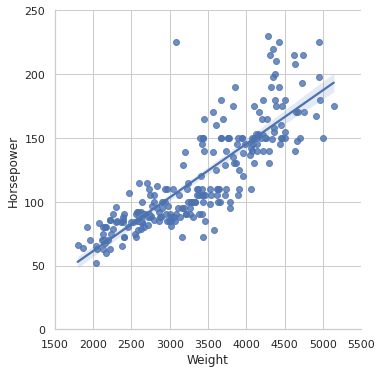

In [124]:
sb.lmplot(data = car_info[car_info['Origin']== 'USA'], x ='Weight', y = 'Horsepower')
plt.axis([1500,5500, 0, 250])

<u>Asia Horsepower vs. Weight Analysis:</u>

(1500.0, 4000.0, 0.0, 150.0)

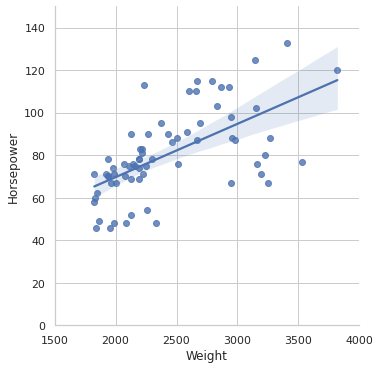

In [121]:
sb.lmplot(data = car_info[car_info['Origin']== 'Asia'], x ='Weight', y = 'Horsepower')
plt.axis([1500,4000, 0, 150])

<u>Europe Horsepower vs. Weight Analysis:</u>

(1500.0, 3000.0, 0.0, 150.0)

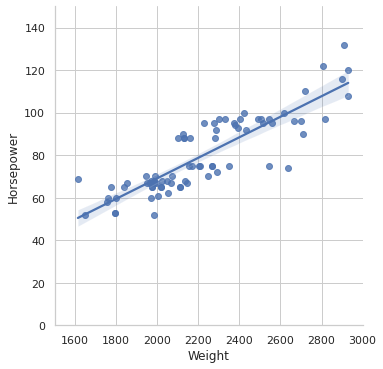

In [119]:
sb.lmplot(data = car_info[car_info['Origin']== 'Europe'], x ='Weight', y = 'Horsepower')
plt.axis([1500,3000, 0, 150])

*Based on the analysis of the last 3 graphs the United States has a variety of cars with various weights and horsepower<br>
*The U.S has the highest horsepower and weights<br>
*It appears there are less cars in Europe and Asia when comparing each to the U.S.